<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Geometric_image_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_with_matplotlib(img, title):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()



In [3]:
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/1572B/production/_88615878_976x1024n0037151.jpg

--2021-01-28 05:26:27--  https://ichef.bbci.co.uk/news/976/cpsprodpb/1572B/production/_88615878_976x1024n0037151.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 184.28.182.142, 2600:1406:3f:39e::f33, 2600:1406:3f:390::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|184.28.182.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75460 (74K) [image/jpeg]
Saving to: ‘_88615878_976x1024n0037151.jpg’

_88615878_976x1024n 100%[===================>]  73.69K  --.-KB/s    in 0.03s   

2021-01-28 05:26:27 (2.53 MB/s) - ‘_88615878_976x1024n0037151.jpg’ saved [75460/75460]



In [4]:
image = cv2.imread('_88615878_976x1024n0037151.jpg')

In [5]:
type(image)

numpy.ndarray

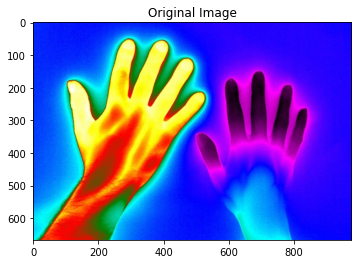

In [12]:
show_with_matplotlib(image,'Original Image')

In [9]:
height,width = dst_image.shape[:2]

In [10]:
dst_image_2 = cv2.resize(image,(width * 2,height * 2),interpolation=cv2.INTER_LINEAR)

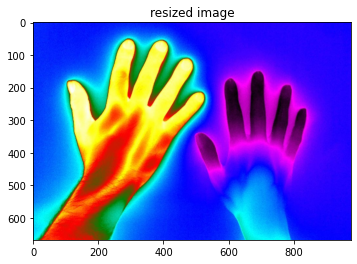

In [14]:
show_with_matplotlib(dst_image_2,'resized image')

##Translation

In [15]:
M = np.float32([[1,0,200],[0,1,30]])

In [16]:
dst_image_3 = cv2.warpAffine(image,M,(width,height))

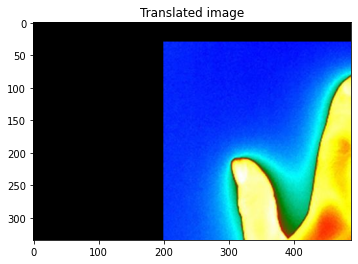

In [17]:
show_with_matplotlib(dst_image_3,'Translated image')

In [18]:
M = np.float32([[1, 0, -200], [0, 1, -30]])
dst_image_4 = cv2.warpAffine(image, M, (width, height))

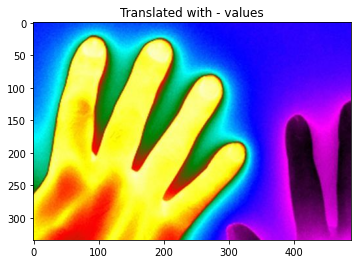

In [19]:
show_with_matplotlib(dst_image_4,'Translated with - values')

##Rotation

In [20]:
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
dst_image_5 = cv2.warpAffine(image, M, (width, height))

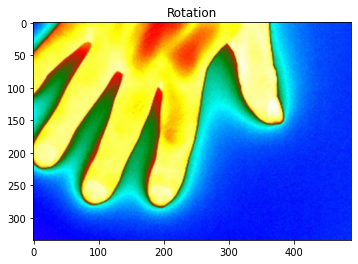

In [22]:
show_with_matplotlib(dst_image_5,'Rotation')

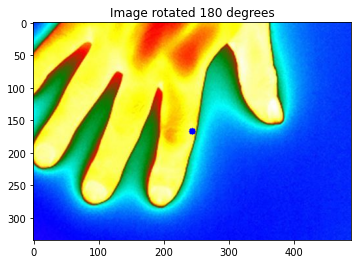

In [24]:
cv2.circle(dst_image_5, (round(width / 2.0), round(height / 2.0)), 5, (255, 0, 0), -1)
show_with_matplotlib(dst_image_5, 'Image rotated 180 degrees')

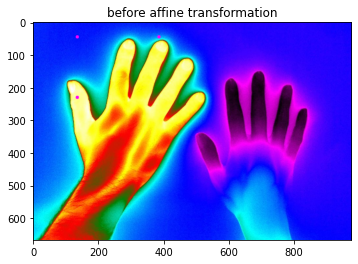

In [25]:
image_points = image.copy()
cv2.circle(image_points, (135, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (385, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (135, 230), 5, (255, 0, 255), -1)

# Show the image with the three created points:
show_with_matplotlib(image_points, 'before affine transformation')


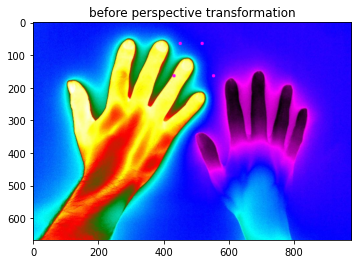

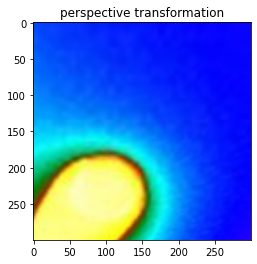

In [26]:
image_points = image.copy()
cv2.circle(image_points, (450, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (517, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (431, 164), 5, (255, 0, 255), -1)
cv2.circle(image_points, (552, 164), 5, (255, 0, 255), -1)

# Show the image:
show_with_matplotlib(image_points, 'before perspective transformation')

# cv2.getPerspectiveTransform() needs four pairs of points
# (coordinates of a quadrangle in both the source and output image)
# We create the arrays for these four pairs of points:
pts_1 = np.float32([[450, 65], [517, 65], [431, 164], [552, 164]])
pts_2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

# To correct the perspective (also known as perspective transformation) you need to create the transformation matrix
# making use of the function cv2.getPerspectiveTransform(), where a 3x3 matrix is constructed:
M = cv2.getPerspectiveTransform(pts_1, pts_2)

# Then, apply cv2.warpPerspective(), where the source image is transformed applying
# the specified matrix and with a specified size:
dst_image = cv2.warpPerspective(image, M, (300, 300))

# Show the image:
show_with_matplotlib(dst_image, 'perspective transformation')